In [2]:
import pygmt

In [26]:
data = pygmt.datasets.load_sample_data(name="japan_quakes")
region = [
    data.longitude.min() - 1,
    data.longitude.max() + 1,
    data.latitude.min() - 1,
    data.latitude.max() + 1,
]
data

,year,month,day,latitude,longitude,depth_km,magnitude
0,1987,1,4,49.77,149.29,489,4.1
1,1987,1,9,39.90,141.68,67,6.8
2,1987,1,9,39.82,141.64,84,4.0
3,1987,1,14,42.56,142.85,102,6.5
4,1987,1,16,42.79,145.10,54,5.1
...,...,...,...,...,...,...,...
110,1988,11,10,35.32,140.88,10,4.0
111,1988,11,29,35.88,141.47,46,4.0
112,1988,12,3,43.53,146.98,39,4.3
113,1988,12,20,43.94,146.13,114,4.5


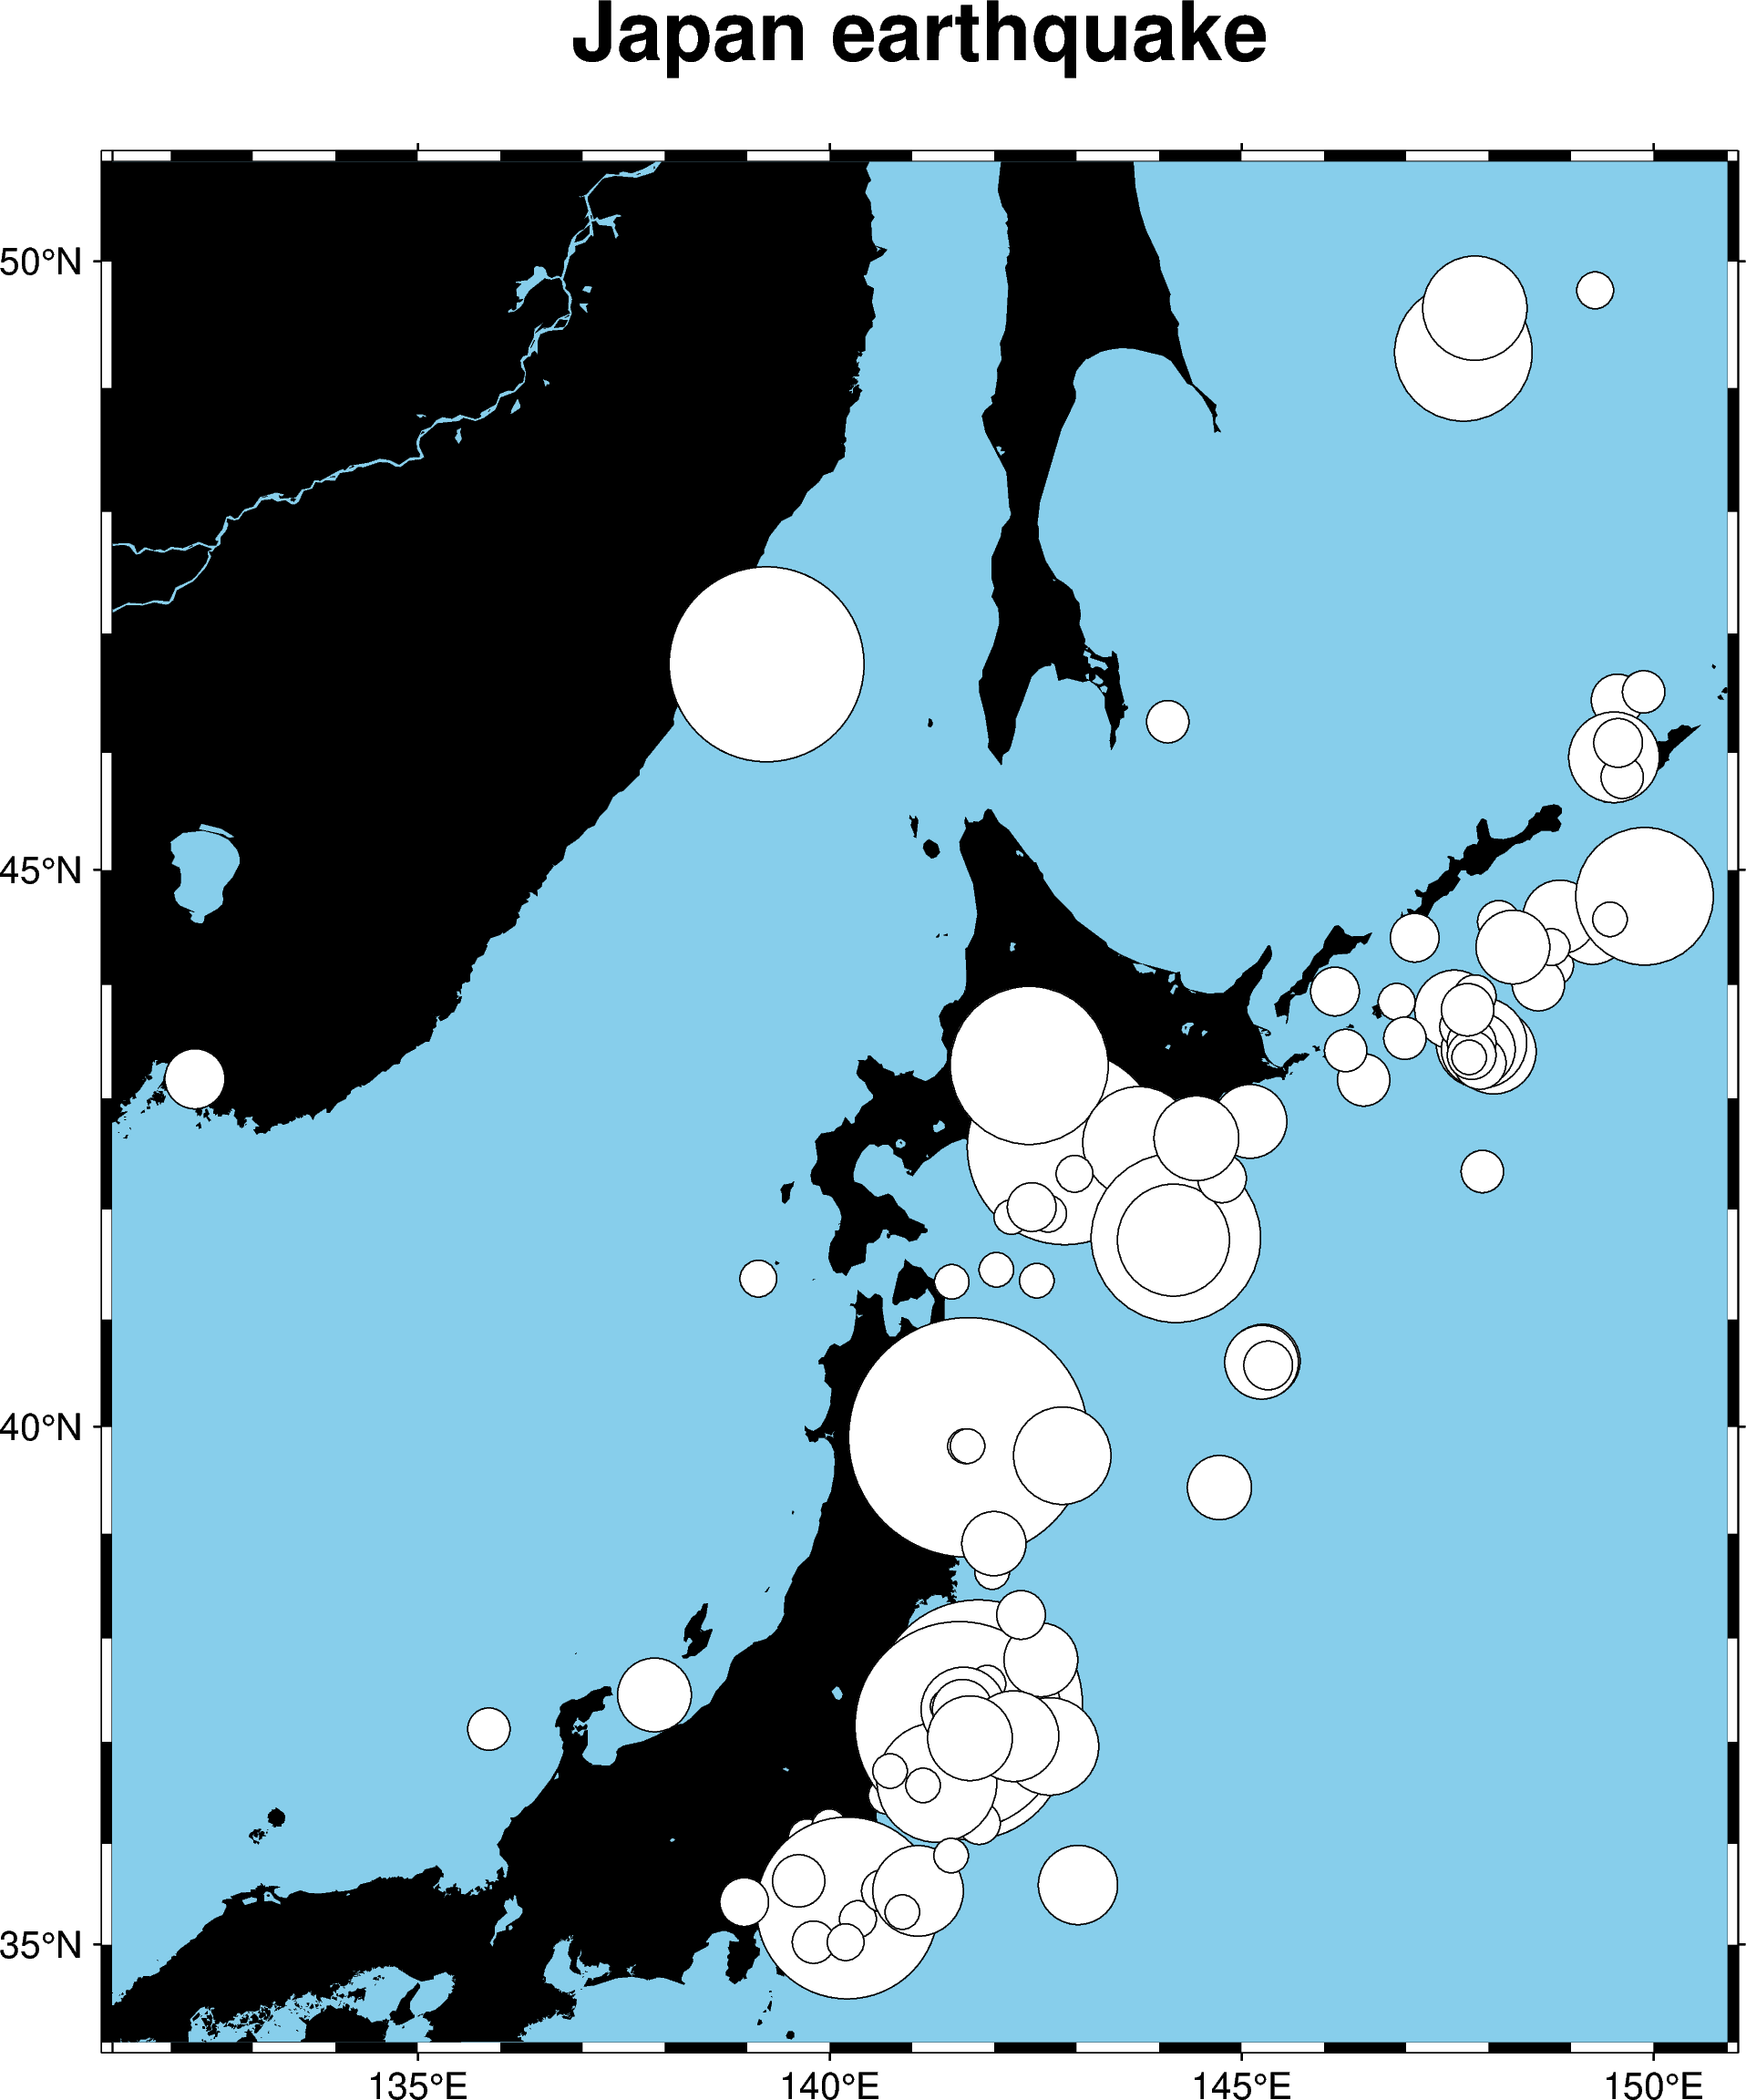

In [40]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=['afg','+tJapan earthquake'])
fig.coast(land="black", water="skyblue")
fig.plot(
    x=data.longitude,
    y=data.latitude,
    size=0.02 * (2**data.magnitude),
    style="cc",
    fill="white", 
    pen="black")
fig.show()

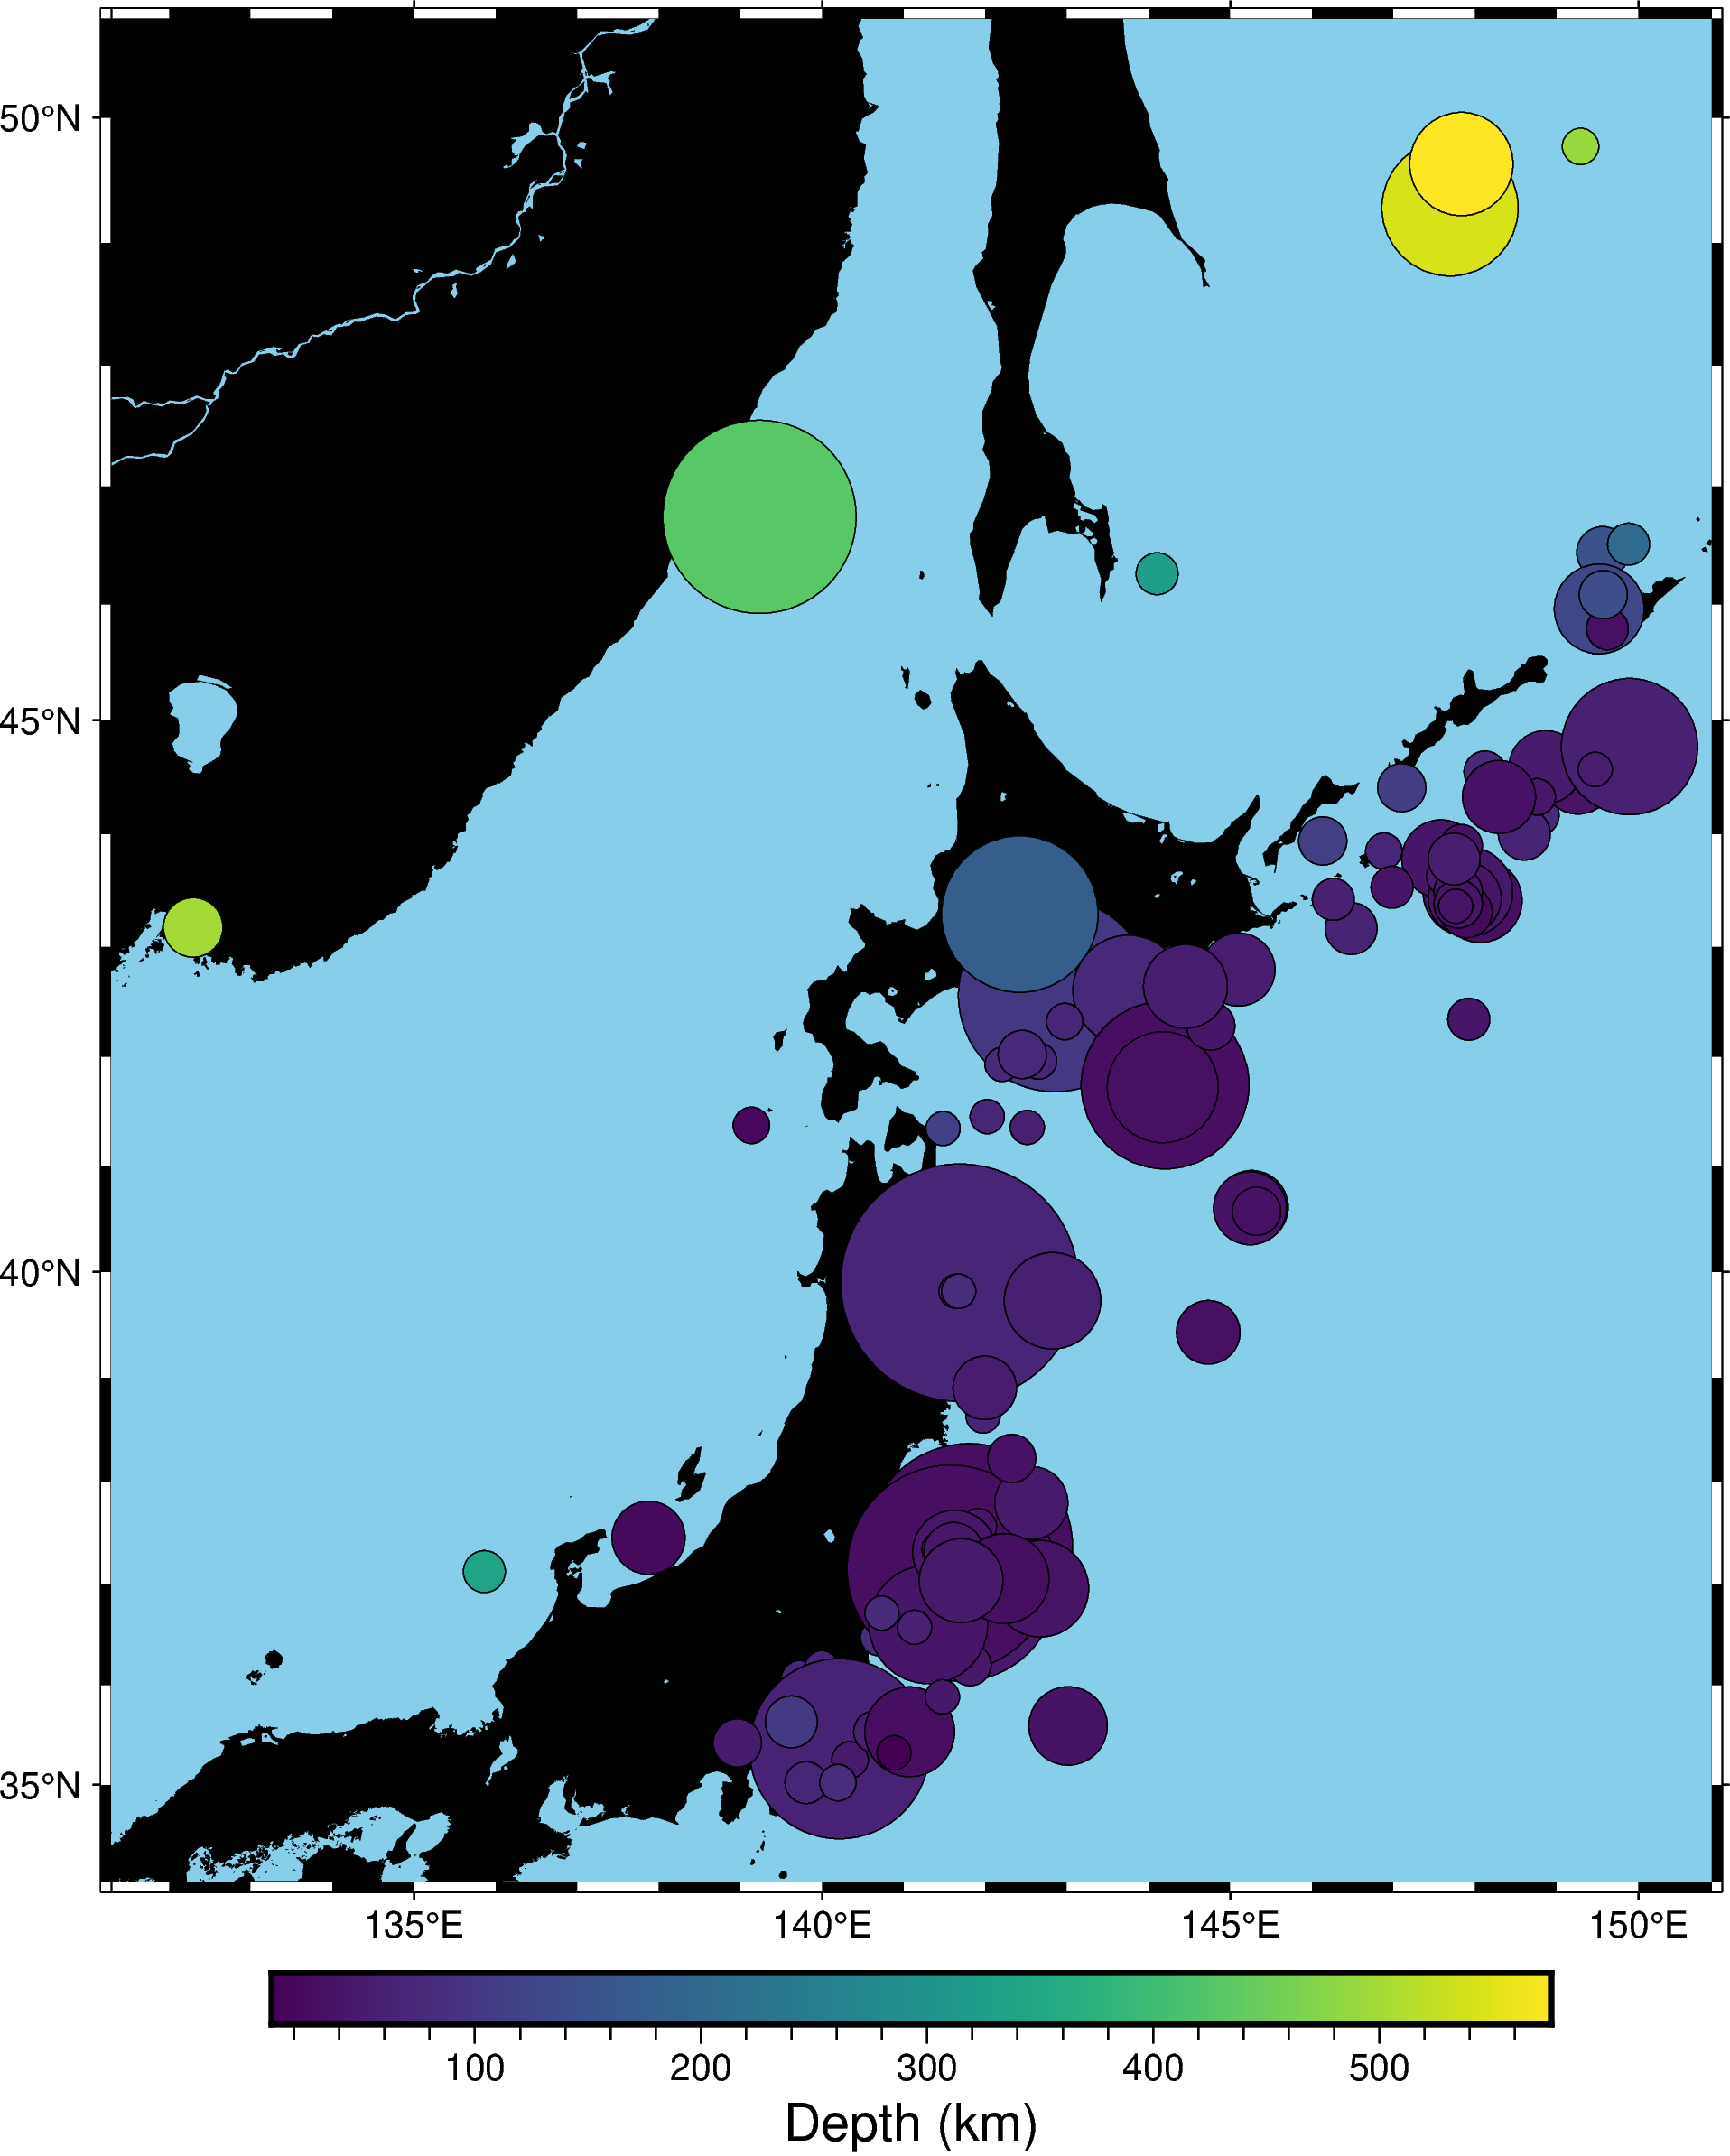

In [43]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="viridis", series=[data.depth_km.min(), data.depth_km.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    size=0.02 * 2**data.magnitude,
    fill=data.depth_km,
    cmap=True,
    style="cc",
    pen="black",
)
fig.colorbar(frame="af+lDepth (km)")
fig.show()